In [ ]:
%pylab inline
!pip install JSAnimation
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [86]:
def sense(x):
    return x

def simulate(Δt, x, u):
    x += Δt * u
    return x

def control1(t, y, ki):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = 2 / 7 * t
    uy = 1.
    xd = 1. / 7. * t * t - 12.
    yd = -7. + t
    u = array([ux, uy]) + ki * t * (array([xd, yd]) - y)
    return u

def control2(t, y, ki):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = 1.
    uy = -1/6
    xd = -5 + t
    yd = 7. - t / 6
    u = array([ux, uy]) + ki * t * (array([xd, yd]) - y)
    return u 

def control3(t, y, ki):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = 2.5 * cos(t)
    uy = -2.5 * sin(t)
    xd = 1 + 2.5 * sin(t)
    yd = 3.5 + 2.5 * cos(t)
    u = array([ux, uy]) + ki * t * (array([xd, yd]) - y)
    return u 

def control4(t, y, ki):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = 1.
    uy = -2/3 * t + 131/42
    xd = -1.5 + t
    yd = -1/3 * t*t + 131/42 * t + 125/14
    u = array([ux, uy]) + ki * t * (array([xd, yd]) - y)
    return u 


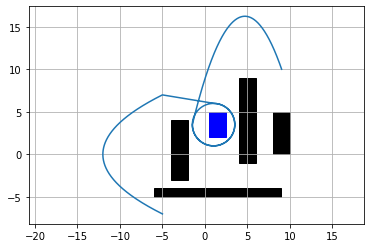

In [94]:
fig,ax = plt.subplots()
rect1 = mpathes.Rectangle([-6., -5.], 15., 1., color='black')
rect2 = mpathes.Rectangle([-4., -3.], 2., 7., color='black')
rect3 = mpathes.Rectangle([4., -1.], 2., 10., color='black')
rect4 = mpathes.Rectangle([8., 0.], 2., 5., color='black')
rect5 = mpathes.Rectangle([0.5, 2.], 2., 3., color='blue')
#circle = mpathes.Circle([1., 3.5], 2.5)
#ax.add_patch(circle)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)

plt.axis('equal')

ki = 0
tf = 14.
Δt = 0.01
time1 = linspace(0., tf, int(tf / Δt) + 1)

x = array([-5., -7.])
x_log = [copy(x)]

for t in time1:
    y = sense(x)
    u = control1(t-7, y, ki)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

tf = 6.
Δt = 0.01
time2 = linspace(0., tf, int(tf / Δt) + 1)


for t in time2:
    y = sense(x)
    u = control2(t, y, ki)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

tf = 7/4 * pi * 2
Δt = 0.01
time3 = linspace(0., tf, int(tf / Δt) + 1)

for t in time3:
    y = sense(x)
    u = control3(t, y, ki)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

tf = 10.5
Δt = 0.01
time4 = linspace(0., tf, int(tf / Δt) + 1)

for t in time4:
    y = sense(x)
    u = control4(t-1.5, y, ki)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))


x_log = array(x_log)

plot(x_log[:,0], x_log[:,1])

plt.grid()
plt.show()

In [95]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time1)+len(time2)+len(time3)+len(time4), interval=60)

HTML(anim.to_jshtml())